In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import scipy.integrate as integrate
import warnings
warnings.simplefilter('ignore')
from scipy import stats as sci

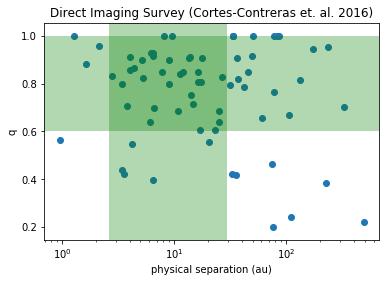

In [2]:
# Importing / setting up direct imaging (DI) data

dist_DI, angle_DI, m1_DI, m2_DI, spt_DI = np.genfromtxt('data\Cortes-Contreras_data.txt', skip_header = 1, delimiter = ',', unpack = True, dtype=(float), usecols = (3, 4, 5, 6, 7))
m1_CC = m1_DI
# calculating separation - by definition of parsec, separation = angular size * parsec
sep_DI = dist_DI * angle_DI

q_DI = np.zeros(70)
q_DI = np.divide(m2_DI, m1_DI)

plt.scatter(sep_DI, q_DI)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(2.6, 29.5, facecolor='g', alpha=.3)
plt.axhspan(.6, 1, facecolor='g', alpha=0.3)
plt.title("Direct Imaging Survey (Cortes-Contreras et. al. 2016)")
plt.show()

43


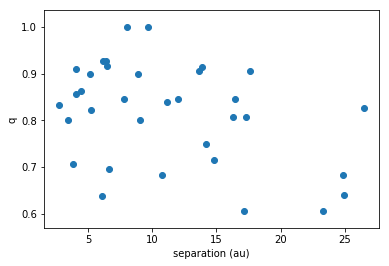

In [3]:
# finding index of values of sep beyond completeness limit
sorted_sep_DI = np.sort(sep_DI)
for pos, val in enumerate(sorted_sep_DI):
    if val > 2.6:
        complete_pos_sep = pos # = 4
#         print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_DI):
    if val > 29.5:
        complete_pos_sep = pos # = 43
        print(complete_pos_sep)
        break  
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
DI_data = np.stack((sep_DI, q_DI, spt_DI))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = DI_data[0,:].argsort() 
DI_data_sorted = DI_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
DI_data_complete1 = np.array([DI_data_sorted[i][4:43] for i in range(0,3)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = DI_data_complete1[1,:].argsort() 
DI_data_sorted2 = DI_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_DI = np.sort(DI_data_sorted2[1])
for pos, val in enumerate(sorted_q_DI):
    if val > .6:
        complete_pos_DI = pos # = 13
#         print(complete_pos_DI)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
CC_data_complete = np.array([DI_data_sorted2[i][5:] for i in range(0,3)])

# print(DI_data_complete)

plt.scatter(CC_data_complete[0],CC_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.show()

[0.028733814982608876 0.7976326909574777 0.04658442059739402
 0.22087331158006182 0.04475480868014641 0.036294678201237336]
4.639037510000115


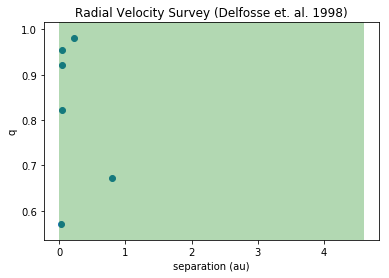

In [4]:
P_RV_days, e_RV, w_RV, k1_RV, k2_RV, v0_RV, m1_RV, m2_RV,sep_RV = np.loadtxt('data\Delfosse_data.txt', skiprows = 2, delimiter = ',', unpack = True)
m1_Del = m1_RV
G = 6.67 * 10**-11 # m**3 kg**-1 s**-2
pi = 3.14159265359

# unit conversion
P_RV_secs = P_RV_days * 86400 # days to seconds
m1_RV_kg = m1_RV * 2*10**30 # Msun to kg
m2_RV_kg = m2_RV * 2*10**30 # Msun to kg

# separation calculation - sep = ((P**2G(m1+m2))/2pi**2)**(1/3)
sep_RV_m = ((((P_RV_secs**2)*G*(m1_RV_kg+m2_RV_kg))/(4*pi**2))**(1/3))
sep_RV = sep_RV_m * 6.685*10**-12
print(sep_RV)

# separation detection limit calculation - sensitive to periods < 20 years and negligible companion mass, using mean mass of primaries and P = 20 years
mean_mass_msun = sum(m1_RV) / len(m1_RV)
mean_mass_kg = mean_mass_msun * 2*10**30
period_limit = 6.307 * 10**8 # 20 years in seconds
sep_complete_m = ((((period_limit**2)*G*mean_mass_kg)/(4*pi**2))**(1/3))
sep_complete_au = sep_complete_m * 6.68459*10**-12 # m to au
print(sep_complete_au) # = 4.6


q_RV = np.divide(m2_RV,m1_RV)

plt.scatter(sep_RV, q_RV)
plt.ylabel("q")
plt.xlabel("separation (au)")
# plt.axvline(x=4.6)
plt.axvspan(0, 4.6, facecolor='g', alpha=.3)
plt.title("Radial Velocity Survey (Delfosse et. al. 1998)")
plt.show()

RV_data = np.stack((sep_RV,q_RV))

1


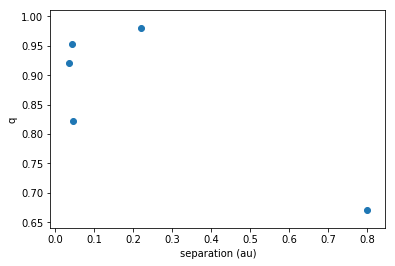

In [5]:
sorted_q_RV = np.sort(q_RV)
for pos, val in enumerate(sorted_q_RV):
    if val > .6:
        complete_pos_q = pos # = 1
        print(complete_pos_q)
        break 

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a2 = RV_data[1,:].argsort() 
RV_data_sorted = RV_data[:,a2]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
Del_data_complete = np.array([RV_data_sorted[i][1:] for i in range(0,2)])

plt.scatter(Del_data_complete[0], Del_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")

plt.show()

In [6]:

print(sci.ks_2samp(CC_data_complete[1],Del_data_complete[1]))
# p is large - accept the null hypothesis that two samples are drawn from same distribution

Ks_2sampResult(statistic=0.48235294117647054, pvalue=0.18536640504452792)


0.39999999999999997


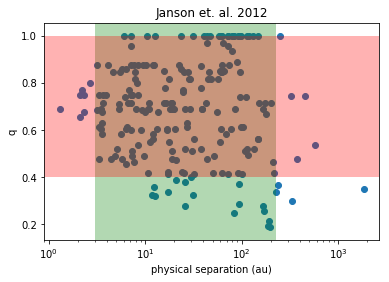

1836.0
573.2


In [2]:
# Janson et. al. 2012
m1_Jan, m2_Jan, sep_Jan = np.loadtxt('data\Janson_data.txt', skiprows = 1, delimiter = ',', unpack = True)

q_Jan = np.zeros(214)
q_Jan = np.divide(m2_Jan, m1_Jan)
print(.08/.2)
plt.scatter(sep_Jan, q_Jan)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(3, 227, facecolor='g', alpha=.3)
plt.axhspan(.4, 1, facecolor='r', alpha=0.3)
plt.title("Janson et. al. 2012")
plt.show()

a = 0
for i in sep_Jan:
    if i > 500:
        print(i)

7
205
66 1


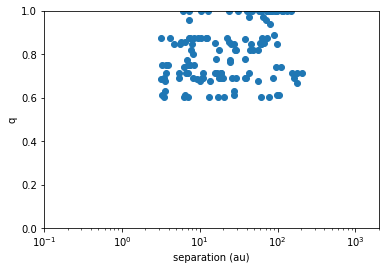

3.2


In [9]:
# finding index of values of sep beyond completeness limit
sorted_sep_Jan = np.sort(sep_Jan)
for pos, val in enumerate(sorted_sep_Jan):
    if val > 3:
        complete_pos_sep = pos # = 7
        print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_Jan):
    if val > 227:
        complete_pos_sep = pos # = 205
        print(complete_pos_sep)
        break  
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
Jan_data = np.stack((sep_Jan, q_Jan))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = Jan_data[0,:].argsort() 
Jan_data_sorted = Jan_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
Jan_data_complete1 = np.array([Jan_data_sorted[i][7:205] for i in range(0,2)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = Jan_data_complete1[1,:].argsort() 
Jan_data_sorted2 = Jan_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_Jan = np.sort(Jan_data_sorted2[1])
for pos, val in enumerate(sorted_q_Jan):
    if val > .6:
        complete_pos_Jan = pos # = 16
        print(complete_pos_Jan, 1)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
Jan_data_complete = np.array([Jan_data_sorted2[i][66:] for i in range(0,2)])

plt.scatter(Jan_data_complete[0],Jan_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(0.1,2000)
plt.ylim(0,1)
plt.show()

print(np.amin(Jan_data_complete[0]))

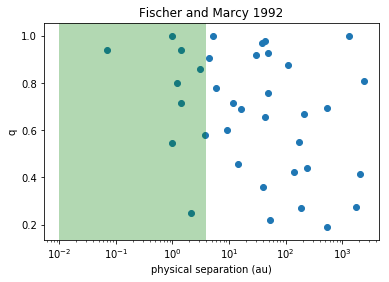

In [9]:
# Fischer and Marcy 1992



sep_FM, m1_FM, m2_FM = np.loadtxt('data\FM_data.txt', skiprows = 1, delimiter = ',', unpack = True)

q_FM = np.zeros(214)
q_FM = np.divide(m2_FM, m1_FM)

plt.scatter(sep_FM, q_FM)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(0.01, 4, facecolor='g', alpha=.3)

plt.title("Fischer and Marcy 1992")
plt.show()



9
3


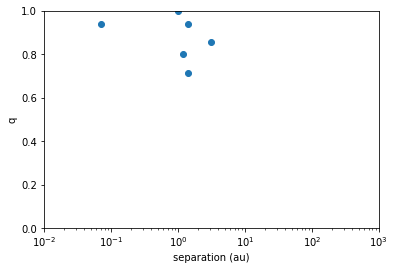

3.1


In [10]:
# finding index of values of sep beyond completeness limit
sorted_sep_FM = np.sort(sep_FM)
for pos, val in enumerate(sorted_sep_FM):
    if val > 4:
        complete_pos_sep = pos # = 9
        print(complete_pos_sep)
        break 
 
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
FM_data = np.stack((sep_FM, q_FM))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = FM_data[0,:].argsort() 
FM_data_sorted = FM_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
FM_data_complete1 = np.array([FM_data_sorted[i][:9] for i in range(0,2)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = FM_data_complete1[1,:].argsort() 
FM_data_sorted2 = FM_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_FM = np.sort(FM_data_sorted2[1])
for pos, val in enumerate(sorted_q_FM):
    if val > .6:
        complete_pos_FM = pos # = 3
        print(complete_pos_FM)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
FM_data_complete = np.array([FM_data_sorted2[i][3:] for i in range(0,2)])

plt.scatter(FM_data_complete[0],FM_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(0.01,1000)
plt.ylim(0,1)
plt.show()
print(np.amax(FM_data_complete[0]))


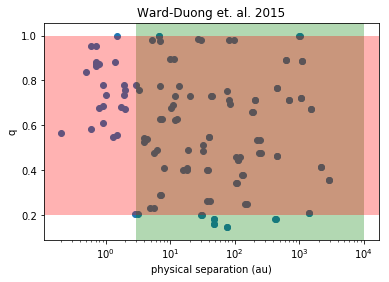

In [11]:
# Ward-Duong et. al. 2015
sep_WD, m1_WD, m2_WD = np.loadtxt('data\WD_data.csv', skiprows = 0, delimiter = ',', unpack = True)

q_WD = np.zeros(214)
q_WD = np.divide(m2_WD, m1_WD)

plt.scatter(sep_WD, q_WD)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(3, 10000, facecolor='g', alpha=.3)
plt.axhspan(.2, 1, facecolor='r', alpha=0.3)
plt.title("Ward-Duong et. al. 2015")
plt.show()

25
55


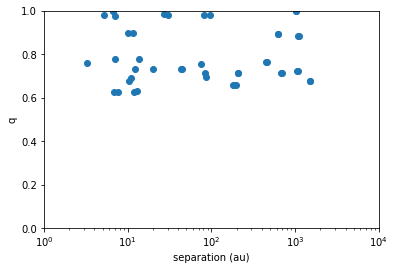

3.3


In [12]:
# finding index of values of sep beyond completeness limit
sorted_sep_WD = np.sort(sep_WD)
for pos, val in enumerate(sorted_sep_WD):
    if val > 3:
        complete_pos_sep = pos # = 25
        print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_WD):
    if val > 10000:
        complete_pos_sep = pos # = none
        print(complete_pos_sep)
        break  
 
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
WD_data = np.stack((sep_WD, q_WD))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = WD_data[0,:].argsort() 
WD_data_sorted = WD_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
WD_data_complete1 = np.array([WD_data_sorted[i][25:] for i in range(0,2)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = WD_data_complete1[1,:].argsort() 
WD_data_sorted2 = WD_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_WD = np.sort(WD_data_sorted2[1])
for pos, val in enumerate(sorted_q_WD):
    if val > .6:
        complete_pos_WD = pos # = 55
        print(complete_pos_WD)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
WD_data_complete = np.array([WD_data_sorted2[i][55:] for i in range(0,2)])

plt.scatter(WD_data_complete[0],WD_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(1,10000)
plt.ylim(0,1)
plt.show()
print(np.amin(WD_data_complete[0]))


[[8.31000000e+01 8.50000000e+01 9.72000000e+01 1.83000000e+02
  1.94900000e+02 2.07300000e+02 2.09400000e+02 4.51500000e+02
  4.56000000e+02 6.19000000e+02 6.21000000e+02 6.84000000e+02
  6.93200000e+02 1.01010000e+03 1.02000000e+03 1.06600000e+03
  1.07170000e+03 1.09180000e+03 1.09600000e+03 1.51100000e+03]
 [7.14285714e-01 6.94444444e-01 9.80000000e-01 6.59090909e-01
  6.59090909e-01 7.11111111e-01 7.11111111e-01 7.64705882e-01
  7.64705882e-01 8.91891892e-01 8.91891892e-01 7.12121212e-01
  7.12121212e-01 1.00000000e+00 1.00000000e+00 7.22222222e-01
  7.22222222e-01 8.84615385e-01 8.84615385e-01 6.75000000e-01]]


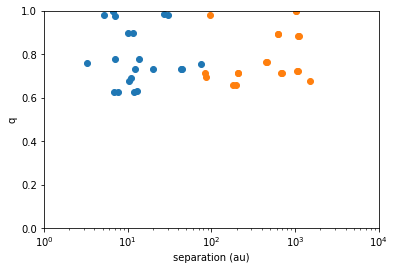

In [13]:
# splitting WD in half by separation
a1 = WD_data_complete[0,:].argsort() 
WD_data_complete_sorted = WD_data_complete[:,a1]

WD_A = WD_data_complete_sorted[:, 0:22]
WD_B = WD_data_complete_sorted[:, 23:43]
print(WD_B)

plt.scatter(WD_A[0],WD_A[1])
plt.scatter(WD_B[0],WD_B[1])
# plt.scatter(WD_data_complete_sorted[0],WD_data_complete_sorted[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(1,10000)
plt.ylim(0,1)
plt.show()


In [5]:


# observed separations within completion (AU)
a_min_CC = 2.7642
a_max_CC = 26.46
a_min_Del = .0363
a_max_Del = .7976
a_min_Jan = 3.2
a_max_Jan = 215.2
a_min_FM = .07
a_max_FM = 3.1
a_min_WD = 3.3
a_max_WD = 1512.1
a_min_WD_A = 3.3
a_max_WD_A = 76
a_min_WD_B = 83.1
a_max_WD_B = 1512.1
a_min_SV = 1
a_max_SV = 10

# # complete separations
# a_min_DI = 2.6
# a_max_DI = 29.5
# a_min_RV = .01
# a_max_RV = 4.6

parent_CC = 490
parent_Del = 115
parent_Jan = 761
parent_FM = 72
parent_WD = 245
parent_WD_A = parent_WD / 2
parent_WD_B = parent_WD / 2
parent_SV = 224

companions_Jan = Jan_data_complete[1].size # q > .6
companions_CC = CC_data_complete[1].size # q > .6
companions_Del = Del_data_complete[1].size # q > .6
companions_FM = FM_data_complete[1].size # q > .6
companions_WD = WD_data_complete[1].size # q > .6
companions_WD_A = WD_A[1].size # q > .6
companions_WD_B = WD_B[1].size # q > .6
companions_SV = 18

f_CC = companions_CC / parent_CC
f_Del = companions_Del / parent_Del
f_Jan = companions_Jan / parent_Jan
f_FM = companions_FM / parent_FM
f_WD = companions_WD / parent_WD
f_WD_A = companions_WD_A / parent_WD_A
f_WD_B = companions_WD_B / parent_WD_B
f_SV = companions_SV / parent_SV

err_CC = math.sqrt(companions_CC) / parent_CC
err_Del = math.sqrt(companions_Del) / parent_Del
err_Jan = math.sqrt(companions_Jan) / parent_Jan
err_FM = math.sqrt(companions_FM) / parent_FM
err_WD = math.sqrt(companions_WD) / parent_WD
err_SV = math.sqrt(companions_SV) / parent_SV
err_WD_A = math.sqrt(companions_WD_A) / parent_WD_A
err_WD_B = math.sqrt(companions_WD_B) / parent_WD_B



print("f_CC = ", f_CC,"f_Del = ", f_Del, "f_Jan = ", f_Jan, "f_FM = ", f_FM, "f_WD = ", f_WD, "f_SV = ", f_SV)

NameError: name 'CC_data_complete' is not defined

In [10]:
companions_Jan = Jan_data_complete[1].size # q > .6
f_Jan = companions_Jan / parent_Jan

print(f_Jan)

0.17345597897503284


In [20]:



# base 10 logspace
# x = log10(mean_a)
 
def log_normal_pdf(x, mu, sigma):
    return (np.exp(-((x - mu)**2 / (2 * sigma**2)))) / (sigma * np.sqrt(2 * np.pi))

# range of potential parameter values - the fit will test each and every single one of these against one-another
mu_range = np.arange(-2, 5, .1)
sigma_range = np.arange(-2, 4, .1)
A_range = np.arange(.1, 2, .1)

# a blank cube which will later be filled with reduced chi-squared values
cube = np.zeros([len(A_range),len(sigma_range),len(mu_range)]) # layers, rows, columns

# initializing constants for use in the fit process
x, y, z = 0, 0, 0
chi_list = []
min_chi = 100
best_mu = "none"
best_sigma = "none"
best_A = "none"

# the fit process
# calculates model frequencies using every single possible parameter value and compares the model frequencies to the simulated survey frequencies using the reduced chi-squared test
for i in range(len(A_range)):
    for j in range(len(sigma_range)):
        for k in range(len(mu_range)):
            
            # storing parameter values
            log_mu = mu_range[k]
            log_sigma = mu_range[j]
            A = A_range[i]
            
            int_CC = integrate.quad(lambda x: log_normal_pdf(x, mu_range[k], sigma_range[j]) , np.log10(a_min_CC), np.log10(a_max_CC))
            int_Del = integrate.quad(lambda x: log_normal_pdf(x, mu_range[k], sigma_range[j]) , np.log10(a_min_Del), np.log10(a_max_Del))
            int_Jan = integrate.quad(lambda x: log_normal_pdf(x, mu_range[k], sigma_range[j]) , np.log10(a_min_Jan), np.log10(a_max_Jan))
            int_FM = integrate.quad(lambda x: log_normal_pdf(x, mu_range[k], sigma_range[j]) , np.log10(a_min_FM), np.log10(a_max_FM))
            int_WD = integrate.quad(lambda x: log_normal_pdf(x, mu_range[k], sigma_range[j]) , np.log10(a_min_WD), np.log10(a_max_WD))   
            int_SV = integrate.quad(lambda x: log_normal_pdf(x, mu_range[k], sigma_range[j]) , np.log10(a_min_SV), np.log10(a_max_SV))   
#             int_WD_A = integrate.quad(lambda x: log_normal_pdf(x, log_mean_a, log_sigma) , np.log10(a_min_WD_A), np.log10(a_max_WD_A))   
#             int_WD_B = integrate.quad(lambda x: log_normal_pdf(x, log_mean_a, log_sigma) , np.log10(a_min_WD_B), np.log10(a_max_WD_B))   

            
            model_CC = A * int_CC[0]
            model_Del = A * int_Del[0]
            model_Jan = A * int_Jan[0]
            model_FM = A * int_FM[0]
            model_WD = A * int_WD[0]
            model_SV = A * int_SV[0]
#             model_WD_A = A * int_WD_A[0]
#             model_WD_B = A * int_WD_B[0]


            
            
            x_CC = np.power(model_CC - f_CC, 2) / np.power(err_CC, 2)
            x_Del = np.power(model_Del - f_Del, 2) / np.power(err_Del, 2)
            x_Jan = np.power(model_Jan - f_Jan, 2) / np.power(err_Jan, 2)
            x_FM = np.power(model_FM - f_FM, 2) / np.power(err_FM, 2)
            x_WD = np.power(model_WD - f_WD, 2) / np.power(err_WD, 2)
            x_SV = np.power(model_SV - f_SV, 2) / np.power(err_SV, 2)
#             x_WD_A = np.power(model_WD_A - f_WD_A, 2) / np.power(err_WD_A, 2)
#             x_WD_B = np.power(model_WD_B - f_WD_B, 2) / np.power(err_WD_B, 2)

    
            x_list = [x_SV, x_CC, x_Jan, x_FM, x_Del, x_WD]
            nu = len(x_list) - 3 # data points - fitted parameters
            chi_sq = (1 / nu) * sum(x_list)
            
            # reduced chi-squared values are stored in a cube - the exact fit parameters used to calculate it are retained as the index of the cube
            cube[i][j][k] = chi_sq
            
            # checking for the best fit parameter values
            # the parameter values used in calculating a reduced chi-squared value that is closest to 1 are considered to be the best fit
            chi_dev = abs(1 - chi_sq)
            # incrementally checks every chi-squared value to find best fit
            if chi_dev < min_chi:
                min_chi = chi_dev
                best_mu = log_mu
                best_sigma = log_sigma
                best_A = A
                best_chi = chi_sq

# printing out best fit values and associated reduced chi-squared
print("Best chi-sq, log(mu), log(sigma), A =", best_chi, best_mu, best_sigma, best_A) 
            
    


Best chi-sq, log(mu), log(sigma), A = 1.2963611145760885 1.300000000000003 1.300000000000003 0.30000000000000004


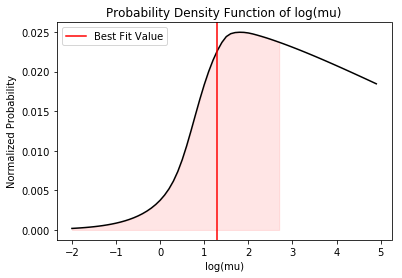

Best Fit log(mu) = 1.300000000000003 ( -2.0  -  2.7000000000000046 )


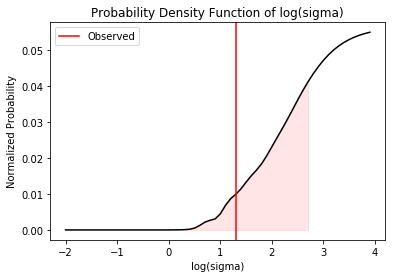

Observed sigma = 1.300000000000003 ( -2.0  -  2.7000000000000046 )


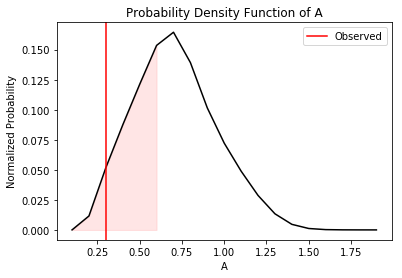

Observed A = 0.30000000000000004 ( 0.1  -  0.6 )


In [21]:
# this function takes in a list and returns the index of the list that is closest to any given number (used in pdf "error bars")
def closest(list, number):
    x = []
    for value in list:
        x.append(abs(number-value))
    return x.index(min(x))


# initializing proability cube
prob_cube = np.zeros([len(A_range),len(sigma_range),len(mu_range)]) # layers, rows, columns

# chi-squared probability formula
def prob_chi(x):
    return x ** ((nu-2)/2) * np.exp(-x/2)

# converting cube from reduced chi-squared values to probabilities (from chi-squared distribution)
for i in range(len(A_range)): # layers
    for j in range(len(sigma_range)): # columns
        for k in range(len(mu_range)): # rows
                prob_cube[i][j][k] = prob_chi(cube[i][j][k])

                
# The following code computes the 1-D pdf's of each of the three fit parameters. First, log(mu). Then, log(sigma) and finally A
      
    
# mu 1-D pdf

# collapsing cube to one dimension
sigmaxmu = np.sum(prob_cube, 0)
mu = np.sum(sigmaxmu, 0)

# normalizing pdf by summing values and multiplying by the amplitude that makes this sum equal to 1
area = sum(mu)
norm_const_mu = 1 / area
norm_mu = norm_const_mu * mu

# drawing "error bars" on the pdf: 
# a cumulative integration gives successive areas under the curve
area_under_1 = integrate.cumtrapz(norm_mu, initial=0)
range_index_1 = closest(mu_range, best_mu)
# 33% of the data on either side of the best fit value is highlighted
width_1 = .66
lower_1 = area_under_1[range_index_1] - (width_1 / 2)
upper_1 = area_under_1[range_index_1] + (width_1 / 2)
lower_index_1 = closest(area_under_1, lower_1)
upper_index_1 = closest(area_under_1, upper_1)

# Graphing
plt.plot(mu_range, norm_mu, color="black")
plt.title("Probability Density Function of log(mu)")
plt.xlabel("log(mu)")
plt.ylabel("Normalized Probability")
plt.axvline(x=best_mu, color="red", label = "Best Fit Value")
plt.legend()
plt.savefig("log(mu)_pdf")
# The following line highlights 66% of the data centered on the best fit value (found above)
plt.fill_between(mu_range[lower_index_1:upper_index_1+1], norm_mu[lower_index_1:upper_index_1+1], color="red", alpha=.1)
plt.show()

print("Best Fit log(mu) =", best_mu, "(", mu_range[lower_index_1], " - ", mu_range[upper_index_1], ")")



# sigma 1-D pdf

# collapsing cube to one dimension
sigmaxmu = np.sum(prob_cube, 0)
sigma = np.sum(sigmaxmu, 1)

# normalizing pdf by summing values and multiplying by the amplitude that makes this sum equal to 1
area = sum(sigma)
norm_const_sigma = 1 / area
norm_sigma = norm_const_sigma * sigma

# drawing "error bars" on the pdf: 
# a cumulative integration gives successive areas under the curve
area_under_2 = integrate.cumtrapz(norm_sigma, initial=0)
range_index_2 = closest(sigma_range, best_sigma)
# 33% of the data on either side of the best fit value is highlighted
width_2 = .66
lower_2 = area_under_2[range_index_2] - (width_2 / 2)
upper_2 = area_under_2[range_index_2] + (width_2 / 2)
lower_index_2 = closest(area_under_2, lower_2)
upper_index_2 = closest(area_under_2, upper_2)

# Graphing
plt.plot(sigma_range, norm_sigma, color="black")
plt.title("Probability Density Function of log(sigma)")
plt.xlabel("log(sigma)")
plt.ylabel("Normalized Probability")
plt.axvline(x=best_sigma, color="red", label = "Observed")
plt.legend()
plt.savefig("log(sigma)_pdf")
# The following line highlights 66% of the data centered on the best fit value (found above)
plt.fill_between(sigma_range[lower_index_2:upper_index_2+1], norm_sigma[lower_index_2:upper_index_2+1], color="red", alpha=.1)
plt.show()

print("Observed sigma =", best_sigma, "(", sigma_range[lower_index_2], " - ", sigma_range[upper_index_2], ")")



# A 1-D pdf

# collapsing cube to one dimension
Axsigma = np.sum(prob_cube, 2)
A = np.sum(Axsigma, 1)

# normalizing pdf by summing values and multiplying by the amplitude that makes this sum equal to 1
area = sum(A)
norm_const_A = 1 / area
norm_A = norm_const_A * A

# drawing "error bars" on the pdf: 
# a cumulative integration gives successive areas under the curve
area_under_3 = integrate.cumtrapz(norm_A, initial=0)
range_index_3 = closest(A_range, best_A)
# 33% of the data on either side of the best fit value is highlighted
width_3 = .66
lower_3 = area_under_3[range_index_3] - (width_3 / 2)
upper_3 = area_under_3[range_index_3] + (width_3 / 2)
lower_index_3 = closest(area_under_3, lower_3)
upper_index_3 = closest(area_under_3, upper_3)

# Graphing
plt.plot(A_range, norm_A, color="black")
plt.title("Probability Density Function of A")
plt.xlabel("A")
plt.ylabel("Normalized Probability")
plt.axvline(x=best_A, color="red", label = "Observed")
# The following line highlights 66% of the data centered on the best fit value (found above)
plt.fill_between(A_range[lower_index_3:upper_index_3+1], norm_A[lower_index_3:upper_index_3+1], color="red", alpha=.1)
plt.legend()
plt.savefig("A_pdf")
plt.show()

print("Observed A =", best_A, "(", A_range[lower_index_3], " - ", A_range[upper_index_3], ")")

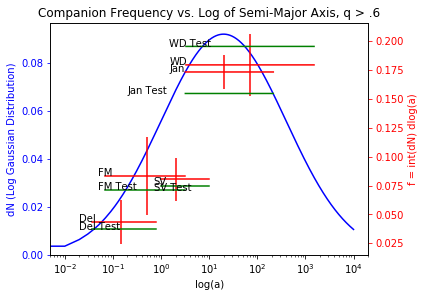

In [26]:
# sigma and mean are in logspace
# x = []
# x_range = []
# log_normal = []
# mean_loga = math.log(20,10)
# A = .249

# def log_normal_pdf(x, mu, sigma):
#     return np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

log_mu = 1.3
log_sigma = 1.3
A = .3

a = np.linspace(0, 10000, 1000000)
x = np.log10(a)
pdf = A * log_normal_pdf(x, log_mu, log_sigma)


fig, ax1 = plt.subplots()
ax1.plot(a, pdf, 'b-')
ax1.set_xlabel('log(a)')
ax1.set_ylabel('dN (Log Gaussian Distribution)', color='b')
ax1.tick_params('y', colors='b')
# ax1.axvline(a_min_DI)
# ax1.axvline(a_max_DI)
# ax1.axvline(a_min_RV)
# ax1.axvline(a_max_RV)
# ax1.axvspan(a_min_CC, a_max_CC, facecolor='grey', alpha=.3)
# ax1.axvspan(a_min_Del, a_max_Del, facecolor='grey', alpha=.3)
# ax1.axvspan(a_min_Jan, a_max_Jan, facecolor='grey', alpha=.3)
# ax1.axvspan(a_min_FM, a_max_FM, facecolor='grey', alpha=.3)
ax1.set_ylim(0)


ax2 = ax1.twinx()
# ax2.scatter(9.5,.069, c = 'red') # f_DI_data
# ax2.scatter(.128,.043, c = 'red') # f_RV_data
# ax2.errorbar(9.5, .069, xerr=5,color = 'red')
# ax2.errorbar(.128, .043, xerr=.03,color = 'red')
ax2.set_ylabel('f = int(dN) dlog(a)', color='r')
CC_domain = []
CC_range = np.arange(a_min_CC,a_max_CC,.01)
for i in range(len(CC_range)):
    CC_domain.append(f_CC)
Del_domain = []
Del_range = np.arange(a_min_Del,a_max_Del,.01)
for i in range(len(Del_range)):
    Del_domain.append(f_Del)    
Jan_domain = []
Jan_range = np.arange(a_min_Jan,a_max_Jan,.01)
for i in range(len(Jan_range)):
    Jan_domain.append(f_Jan)
FM_domain = []
FM_range = np.arange(a_min_FM,a_max_FM,.01)
for k in range(len(FM_range)):
    FM_domain.append(f_FM)
WD_domain = []
WD_range = np.arange(a_min_WD,a_max_WD,.01)
for k in range(len(WD_range)):
    WD_domain.append(f_WD)    
SV_domain = []
SV_range = np.arange(a_min_SV,a_max_SV,.01)
for k in range(len(SV_range)):
    SV_domain.append(f_SV)

# ax2.annotate('CC', xy=(1.5, f_CC))
ax2.annotate('Del', xy=(.02, f_Del))
ax2.annotate('Jan', xy=(1.5, f_Jan))
ax2.annotate('FM', xy=(.05, f_FM))
ax2.annotate('WD', xy=(1.5, f_WD))
ax2.annotate('SV', xy=(.7, f_SV-.005))
    
# ax2.plot(CC_range,CC_domain, color="red")
ax2.plot(Del_range,Del_domain, color="red")
ax2.plot(Jan_range,Jan_domain, color="red")
ax2.plot(FM_range,FM_domain, color="red")
ax2.plot(WD_range,WD_domain, color="red")
ax2.plot(SV_range,SV_domain, color="red")

# mid = sum((a_min_Jan, a_max_Jan))/2
# ax2.errorbar(log10(mid), f_Jan, yerr = err_Jan)

ax2.tick_params('y', colors='r')
# ax2.set_ylim(0,.1)

ax2.errorbar(20, f_Jan, yerr = err_Jan, xerr = None, ecolor = 'red')
ax2.errorbar(70, f_WD, yerr = err_WD, xerr = None, ecolor = 'red')
ax2.errorbar(.5, f_FM, yerr = err_FM, xerr = None, ecolor = 'red')
ax2.errorbar(2, f_SV, yerr = err_SV, xerr = None, ecolor = 'red')
ax2.errorbar(.15, f_Del, yerr = err_Del, xerr = None, ecolor = 'red')


# integrating model over ranges of surveys and plotting for testing purposes

# test_int_CC = integrate.quad(lambda x: log_normal_pdf(x, log_mu, log_sigma) , np.log10(a_min_CC), np.log10(a_max_CC))
test_int_Del = integrate.quad(lambda x: log_normal_pdf(x, log_mu, log_sigma) , np.log10(a_min_Del), np.log10(a_max_Del))
test_int_Jan = integrate.quad(lambda x: log_normal_pdf(x, log_mu, log_sigma) , np.log10(a_min_Jan), np.log10(a_max_Jan))
test_int_FM = integrate.quad(lambda x: log_normal_pdf(x, log_mu, log_sigma) , np.log10(a_min_FM), np.log10(a_max_FM))
test_int_WD = integrate.quad(lambda x: log_normal_pdf(x, log_mu, log_sigma) , np.log10(a_min_WD), np.log10(a_max_WD))   
test_int_SV = integrate.quad(lambda x: log_normal_pdf(x, log_mu, log_sigma) , np.log10(a_min_SV), np.log10(a_max_SV))

# test_CC = A * test_int_CC[0]
test_Del = A * test_int_Del[0]
test_Jan = A * test_int_Jan[0]
test_FM = A * test_int_FM[0]
test_WD = A * test_int_WD[0]
test_SV = A * test_int_SV[0]

# CC_domain_test = []
# CC_range_test = np.arange(a_min_CC,a_max_CC,.01)
# for i in range(len(CC_range_test)):
#     CC_domain_test.append(test_CC)
Del_domain_test = []
Del_range_test = np.arange(a_min_Del,a_max_Del,.01)
for i in range(len(Del_range_test)):
    Del_domain_test.append(test_Del)
Jan_domain_test = []
Jan_range_test = np.arange(a_min_Jan,a_max_Jan,.01)
for i in range(len(Jan_range_test)):
    Jan_domain_test.append(test_Jan)
FM_domain_test = []
FM_range_test = np.arange(a_min_FM,a_max_FM,.01)
for i in range(len(FM_range_test)):
    FM_domain_test.append(test_FM)
WD_domain_test = []
WD_range_test = np.arange(a_min_WD,a_max_WD,.01)
for i in range(len(WD_range_test)):
    WD_domain_test.append(test_WD)
SV_domain_test = []
SV_range_test = np.arange(a_min_SV,a_max_SV,.01)
for i in range(len(SV_range_test)):
    SV_domain_test.append(test_SV)
    
ax2.plot(Del_range_test,Del_domain_test, color="green")
ax2.plot(Jan_range_test,Jan_domain_test, color="green")
ax2.plot(FM_range_test,FM_domain_test, color="green")
ax2.plot(WD_range_test,WD_domain_test, color="green")
ax2.plot(SV_range_test,SV_domain_test, color="green")

ax2.annotate('Del Test', xy=(.02, test_Del))
ax2.annotate('Jan Test', xy=(.2, test_Jan))
ax2.annotate('FM Test', xy=(.05, test_FM))
ax2.annotate('WD Test', xy=(1.5, test_WD))
ax2.annotate('SV Test', xy=(.7, test_SV-.005))


fig.tight_layout()
plt.xscale('log')
plt.title("Companion Frequency vs. Log of Semi-Major Axis, q > .6")
# plt.savefig('result.jpg')
plt.show()

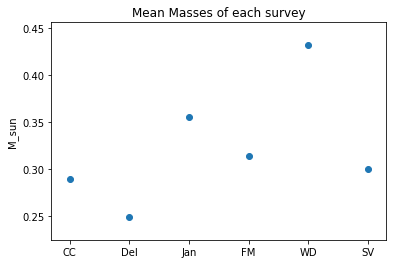

In [17]:
# mean primary masses and ranges
mean_mass_CC = np.mean(m1_CC) 
mean_mass_Del = np.mean(m1_Del)
mean_mass_Jan = np.mean(m1_Jan)
mean_mass_FM = np.mean(m1_FM)
mean_mass_WD = np.mean(m1_WD)
mean_mass_SV = .3
mean_masses = [mean_mass_CC, mean_mass_Del, mean_mass_Jan, mean_mass_FM, mean_mass_WD, mean_mass_SV]

lower_mass_CC, upper_mass_CC = np.sort(m1_CC)[0], np.sort(m1_CC)[-1]
lower_mass_Del, upper_mass_Del = np.sort(m1_Del)[0], np.sort(m1_Del)[-1]
lower_mass_Jan, upper_mass_Jan = np.sort(m1_Jan)[0], np.sort(m1_Jan)[-1]
lower_mass_FM, upper_mass_FM = np.sort(m1_FM)[0], np.sort(m1_FM)[-1]
lower_mass_WD, upper_mass_WD = np.sort(m1_WD)[0], np.sort(m1_WD)[-1]

ax1 = plt.subplots

surveys = ["CC", "Del", "Jan", "FM", "WD", "SV"]
xticks = [1, 2, 3, 4, 5, 6]
plt.xticks(xticks,surveys)

plt.scatter(xticks, mean_masses)
plt.title("Mean Masses of each survey")
plt.ylabel('M_sun')
plt.show()

# print(mean_mass_CC)
# print(mean_mass_Del)
# print(mean_mass_Jan)
# print(mean_mass_FM)
# print(mean_mass_WD)

# print(lower_mass_CC, upper_mass_CC)
# print(lower_mass_Del, upper_mass_Del)
# print(lower_mass_Jan, upper_mass_Jan)
# print(lower_mass_FM, upper_mass_FM)
# print(lower_mass_WD, upper_mass_WD)